In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**given a date, displays the injected gas meter volume and its respective percentage the gas valve is open**

Text(0.5, 1.0, 'Inj Gas Meter Volume & Inj Gas Valve Percent Open over Time on Empty DataFrame\nColumns: [Time, Inj Gas Meter Volume Instantaneous, Inj Gas Meter Volume Setpoint, Inj Gas Valve Percent Open]\nIndex: []')

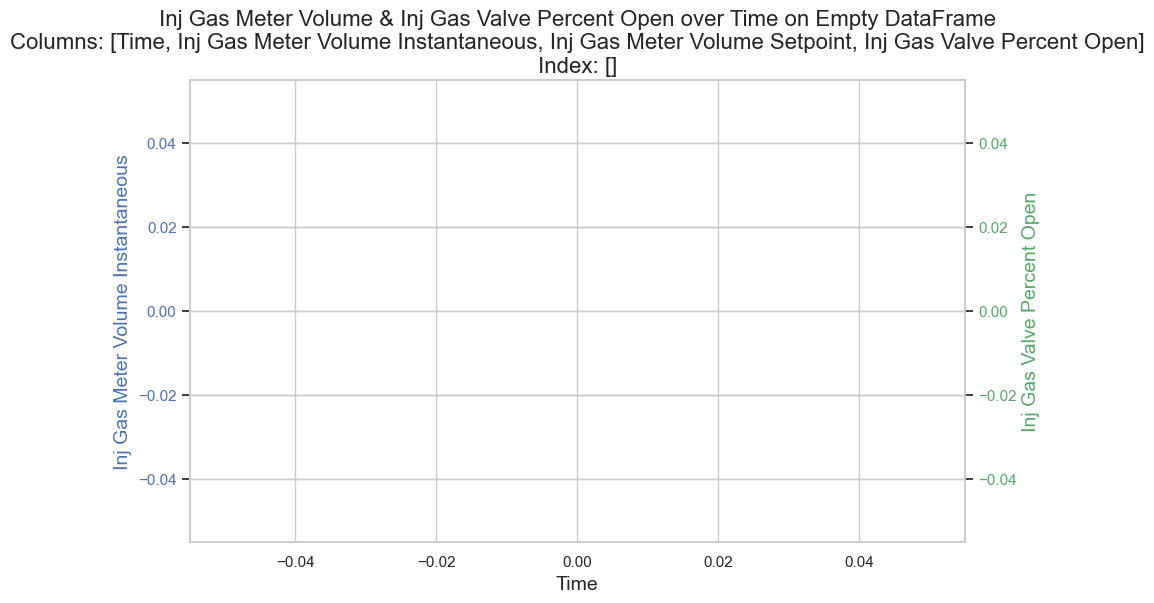

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('bold.csv') # reads csv file

# convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %I:%M:%S %p')

# filter over a single day: YYYY-MM-DD
day = data[data['Time'].dt.date == pd.to_datetime(input("YYYY-MM-DD?")).date()]
data['Inj Gas Valve Percent Open'] = data['Inj Gas Valve Percent Open'].interpolate(method='linear')

sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6)) # two axises -- meter volume, percentage

# plots Inj Gas Meter Volume Instantaneous on primary y-axis
sns.lineplot(x='Time', y='Inj Gas Meter Volume Instantaneous', data=day, marker='o', color='b', ax=ax1)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Inj Gas Meter Volume Instantaneous', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# secondary y-axis for Inj Gas Valve Percent Open
ax2 = ax1.twinx()
sns.lineplot(x='Time', y='Inj Gas Valve Percent Open', data=day, marker='o', color='g', ax=ax2) # ax= ax2
ax2.set_ylabel('Inj Gas Valve Percent Open', fontsize=14, color='g')
ax2.tick_params(axis='y', labelcolor='g')


plt.title(f"Inj Gas Meter Volume & Inj Gas Valve Percent Open over Time on {day}", fontsize=16)
#plt.xticks(rotation=45)
# plt.show()


**comparing error**
hypothesis: when the setpoint value is exceeded more than 20, and the percentage the gas valve is open is lower than 28%, hydrate will form.

***predictions?!***

In [150]:
# time to datetime
data['Time'] = pd.to_datetime(data['Time'])

# interpolation for missing percentage values
data['Inj Gas Valve Percent Open'] = data['Inj Gas Valve Percent Open'].interpolate(method='linear')

# filling setpoint values with constant value of 375
data['Inj Gas Meter Volume Setpoint'] = 375.0

# error between the instantaneous gas meter volumes and setpoint
data['Error'] = data['Inj Gas Meter Volume Instantaneous'] - data['Inj Gas Meter Volume Setpoint']
data.head()

# sample thresholds to determine hydrate formation
high_volume_threshold = data['Inj Gas Meter Volume Instantaneous'].quantile(0.75)  # top 25% as "high volume"
low_percent_threshold = data['Inj Gas Valve Percent Open'].quantile(0.25)  # bottom 25% as "low percent"
high_error_threshold = data['Error'].quantile(0.75)  # top 25% as "high error"

# 'Hydrate_Formed' based on these conditions
data['Hydrate_Formed'] = (
    (data['Inj Gas Meter Volume Instantaneous'] > high_volume_threshold) &
    (data['Inj Gas Valve Percent Open'] < low_percent_threshold) &
    (data['Error'] > high_error_threshold)
)

# data.tail(50)
